# Soluction

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def noise_removal(img,unit=3):
    # Noise removal
    #unit=3
    clear_image = cv2.medianBlur(img,3)
    return clear_image

def img_preprocessing(img,unit=100):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    edges = cv2.Canny(gray_image, 50, 150)
#     ret, thresh = cv2.threshold(edges, unit, 200, cv2.THRESH_BINARY)
    return edges

def length_angle(img,clear_img,PPI=72):
    clean_img=clear_img.copy()
    length_of_pencil=[]
    lines = cv2.HoughLinesP(img, rho=1, theta=np.pi/180, threshold=20, minLineLength=200, maxLineGap=100)
    # lines = cv2.HoughLines(edges, 1, np.pi/180, 400)

# Iterate over the lines and measure their lengths and angles
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Calculate length using distance formula
        length = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        cv2.line(clean_img, (x1, y1), (x2, y2), (0, 255, 0), 3)
        length_cm = length / PPI * 2.54
        length_of_pencil.append(length_cm)
        
    # Calculate angle if two lines are detected
    if len(lines) >2:
        x3, y3, x4, y4 = lines[1][0]
        angle = math.atan2((y4 - y3), (x4 - x3)) - math.atan2((y2 - y1), (x2 - x1))
#         print("Angle between pencils:", math.degrees(angle))
        
    return clean_img,length_of_pencil,math.degrees(angle)



The length of Line B is 20.003262796575857 cm 
 The angle between line A & B 28.91220122857361 degree


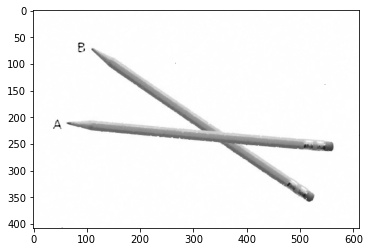

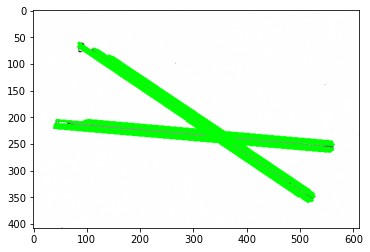

In [9]:
img=cv2.imread('2_pencils.jpg')
clear_img=noise_removal(img)
edges= img_preprocessing(clear_img)
output_image,length,angle=length_angle(edges,clear_img,65)

print("The length of Line B is",length[2],"cm","\n","The angle between line A & B",angle,"degree")
plt.figure()
plt.imshow(clear_img)
plt.figure()
plt.imshow(output_image)
plt.show()



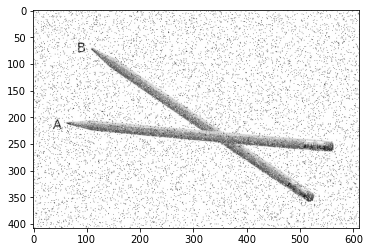

In [3]:
img=cv2.imread('2_pencils.jpg')
plt.imshow(img)
